In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return -np.sin(3*x) - x**2/2 - 0.7*x

In [3]:
x = np.linspace(-1, 1, 100)
y = f(x)
miny = min(y)
minx = x[np.argmin(y)]

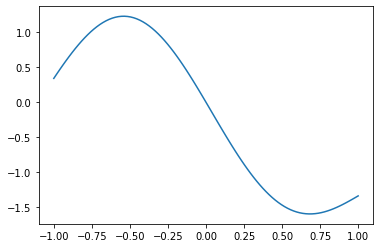

In [4]:
plt.plot(x,y)

In [5]:
#!pip install hyperopt
from hyperopt import hp

# Create the domain space
space = hp.uniform('x', -1, 1)

In [6]:

from hyperopt import Trials

# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

In [7]:
from hyperopt import rand, tpe

# Create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest

In [8]:
from hyperopt import fmin

# Run 2000 evals with the tpe algorithm
tpe_best = fmin(fn=f, space=space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=2000, rstate= np.random.RandomState(50))

print(tpe_best)

100%|█| 2000/2000 [00:13<00:00, 144.67trial/s
{'x': 0.6833015721949994}


In [9]:
# Run 2000 evals with the random algorithm
rand_best = fmin(fn=f, space=space, algo=rand_algo, trials=rand_trials, 
                 max_evals=2000, rstate= np.random.RandomState(50))

100%|█| 2000/2000 [00:04<00:00, 496.00trial/s


In [10]:
# Print out information about losses
print('Minimum loss attained with TPE:    {:.4f}'.format(tpe_trials.best_trial['result']['loss']))
print('Minimum loss attained with random: {:.4f}'.format(rand_trials.best_trial['result']['loss']))
print('Actual minimum of f(x):            {:.4f}'.format(miny))

# Print out information about number of trials
print('\nNumber of trials needed to attain minimum with TPE:    {}'.format(tpe_trials.best_trial['misc']['idxs']['x'][0]))
print('Number of trials needed to attain minimum with random: {}'.format(rand_trials.best_trial['misc']['idxs']['x'][0]))

# Print out information about value of x
print('\nBest value of x from TPE:    {:.4f}'.format(tpe_best['x']))
print('Best value of x from random: {:.4f}'.format(rand_best['x']))
print('Actual best value of x:      {:.4f}'.format(minx))

Minimum loss attained with TPE:    -1.5992
Minimum loss attained with random: -1.5992
Actual minimum of f(x):            -1.5990

Number of trials needed to attain minimum with TPE:    1995
Number of trials needed to attain minimum with random: 1862

Best value of x from TPE:    0.6833
Best value of x from random: 0.6834
Actual best value of x:      0.6768


In [11]:
tpe_results = pd.DataFrame({'loss': [x['loss'] for x in tpe_trials.results], 'iteration': tpe_trials.idxs_vals[0]['x'],
                            'x': tpe_trials.idxs_vals[1]['x']})
                            
tpe_results.head()

,loss,iteration,x
0,-1.350835,0,0.992343
1,-1.594082,1,0.721979
2,-1.464399,2,0.494357
3,0.638416,3,-0.184702
4,0.390292,4,-0.984879


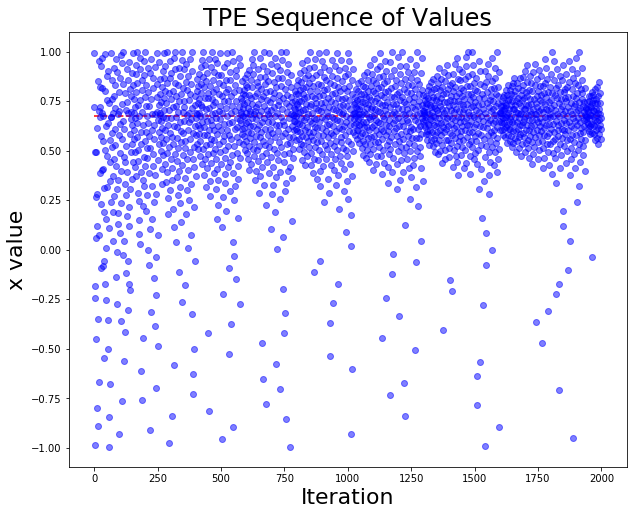

In [12]:
plt.figure(figsize = (10, 8))
plt.plot(tpe_results['iteration'], tpe_results['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22);
plt.title('TPE Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');

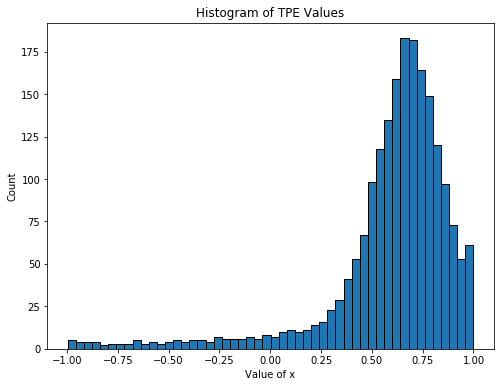

In [13]:
plt.figure(figsize = (8, 6))
plt.hist(tpe_results['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of TPE Values'); plt.xlabel('Value of x'); plt.ylabel('Count');

In [14]:
rand_results = pd.DataFrame({'loss': [x['loss'] for x in rand_trials.results]
                             , 'iteration': rand_trials.idxs_vals[0]['x'],
                            'x': rand_trials.idxs_vals[1]['x']})
                            
rand_results.head()

,loss,iteration,x
0,-1.350835,0,0.992343
1,-1.594082,1,0.721979
2,-1.464399,2,0.494357
3,0.638416,3,-0.184702
4,0.390292,4,-0.984879


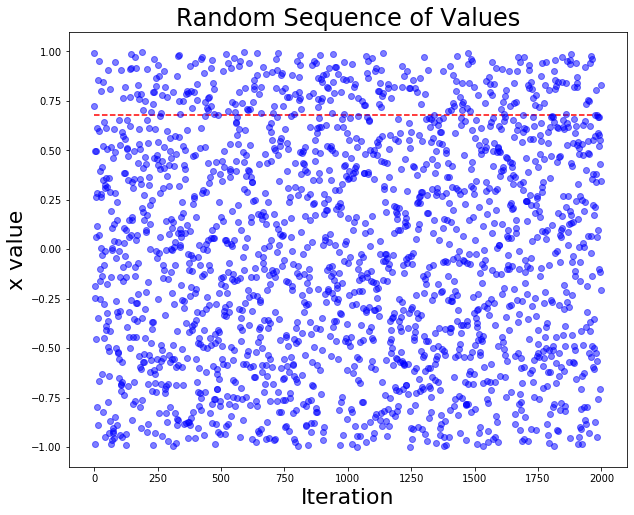

In [15]:
plt.figure(figsize = (10, 8))
plt.plot(rand_results['iteration'], rand_results['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); 
plt.title('Random Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');